
# <p style="padding:10px;background-color:#232323;margin:0;color:white;font-family:newtimeroman;font-size:180%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Downhole Production Data Analytics</p>



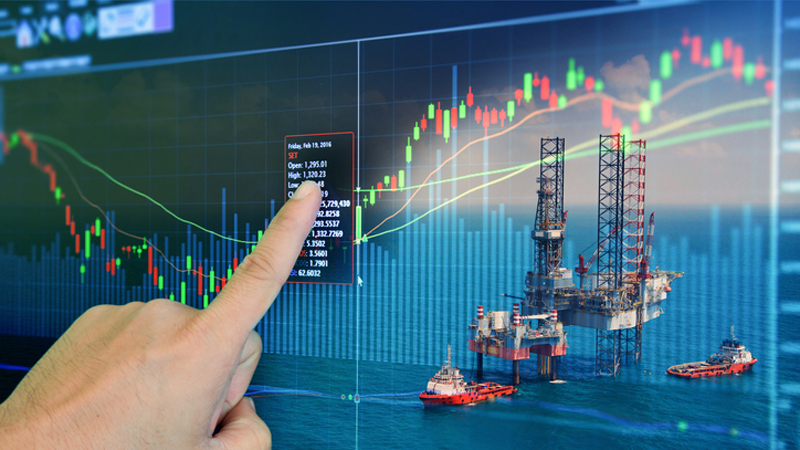

**by Sobhan Mohammadi**
* Previously: Wireline Logging General Field Engineer
* Currently  :  Data Sience&AI Student
* EMail      : sobhanmohammadi.ds@gmail.com

# <p style="padding:10px;background-color:#232323;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing Libraries</p>



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# <p style="padding:10px;background-color:#232323;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing Dataset</p>



In [7]:
df = pd.read_csv('Well production analysis data.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   15634 non-null  object 
 1   NPD_WELL_BORE_NAME        15634 non-null  object 
 2   ON_STREAM_HRS             15349 non-null  float64
 3   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64
 4   AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64
 5   AVG_DP_TUBING             8980 non-null   float64
 6   AVG_ANNULUS_PRESS         7890 non-null   float64
 7   AVG_CHOKE_SIZE_P          8919 non-null   float64
 8   AVG_WHP_P                 9155 non-null   float64
 9   AVG_WHT_P                 9146 non-null   float64
 10  DP_CHOKE_SIZE             15340 non-null  float64
 11  BORE_OIL_VOL              9161 non-null   float64
 12  BORE_GAS_VOL              9161 non-null   float64
 13  BORE_WAT_VOL              9161 non-null   float64
 14  BORE_W

In [3]:
df.head(5)

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,07-Apr-14,15/9-F-1 C,0.0,0.000,0.000,0.000,0.0,0.00000,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
1,08-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,1.00306,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
2,09-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.97901,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
3,10-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.54576,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
4,11-Apr-14,15/9-F-1 C,0.0,310.376,96.876,277.278,0.0,1.21599,33.098,10.48,33.072,0.0,0.0,0.0,NaN,production


In [4]:
df.tail(5)

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
15629,14-Sep-16,15/9-F-5,0.0,NaN,NaN,NaN,0.273,0.63609,0.078,0.229,0.019,0.0,0.0,0.0,NaN,production
15630,15-Sep-16,15/9-F-5,0.0,NaN,NaN,NaN,0.287,0.67079,0.085,0.229,0.006,0.0,0.0,0.0,NaN,production
15631,16-Sep-16,15/9-F-5,0.0,NaN,NaN,NaN,0.286,0.66439,0.085,0.229,0.012,0.0,0.0,0.0,NaN,production
15632,17-Sep-16,15/9-F-5,0.0,NaN,NaN,NaN,0.272,0.62466,0.075,0.228,0.026,0.0,0.0,0.0,NaN,production
15633,18-Sep-16,15/9-F-5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.0,injection


# <p style="padding:10px;background-color:#232323;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">EDA & Preprocessing</p>

* **Convert date into python format using pandas**

In [5]:
df["DATEPRD"]=pd.to_datetime(df["DATEPRD"], format="%d-%b-%y")
df.head(5)

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,2014-04-07,15/9-F-1 C,0.0,0.000,0.000,0.000,0.0,0.00000,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
1,2014-04-08,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,1.00306,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
2,2014-04-09,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.97901,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
3,2014-04-10,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.54576,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
4,2014-04-11,15/9-F-1 C,0.0,310.376,96.876,277.278,0.0,1.21599,33.098,10.48,33.072,0.0,0.0,0.0,NaN,production


In [6]:
print(df.columns)

Index(['DATEPRD', 'NPD_WELL_BORE_NAME', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND'],
      dtype='object')


In [7]:
print(df['NPD_WELL_BORE_NAME'].unique())

['15/9-F-1 C' '15/9-F-11' '15/9-F-12' '15/9-F-14' '15/9-F-15 D' '15/9-F-4'
 '15/9-F-5']


In [8]:
well_14=df[df['NPD_WELL_BORE_NAME']=='15/9-F-14']
well_14

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
4967,2008-02-12,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.059,0.0,0.0,0.0,NaN,production
4968,2008-02-13,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.068,0.0,0.0,0.0,NaN,production
4969,2008-02-14,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.050,0.0,0.0,0.0,NaN,production
4970,2008-02-15,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.066,0.0,0.0,0.0,NaN,production
4971,2008-02-16,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.105,0.0,0.0,0.0,NaN,production
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8018,2016-09-13,15/9-F-14,0.0,0.0,0.0,10.873,10.583,0.94937,10.873,0.0,8.894,0.0,0.0,0.0,NaN,production
8019,2016-09-14,15/9-F-14,0.0,0.0,0.0,10.877,10.583,1.11452,10.877,0.0,8.888,0.0,0.0,0.0,NaN,production
8020,2016-09-15,15/9-F-14,0.0,0.0,0.0,10.883,10.582,1.00047,10.883,0.0,8.856,0.0,0.0,0.0,NaN,production
8021,2016-09-16,15/9-F-14,0.0,0.0,0.0,10.879,10.583,1.16066,10.879,0.0,8.839,0.0,0.0,0.0,NaN,production


* **Summary sataistics of the data**

In [9]:
well_14.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
count,3056.000000,3050.000000,3050.000000,3050.000000,2533.000000,2860.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,0.0
mean,20.541194,233.074651,95.133791,192.653088,10.527985,69.390287,41.530601,77.103033,15.435755,1290.009817,189139.247382,2330.245746,NaN
std,7.881136,64.923765,25.846814,57.736987,9.704603,31.064576,22.719575,25.615707,19.965158,1298.363790,184204.112292,1462.922870,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-59.000000,NaN
25%,24.000000,237.493000,99.621000,180.749500,0.000000,43.014158,31.020500,81.223500,2.665500,210.000000,31303.750000,695.500000,NaN
50%,24.000000,246.776000,101.007500,204.247500,12.969000,71.012955,33.546000,86.963500,7.177500,881.000000,142363.000000,2965.500000,NaN
75%,24.000000,261.971250,105.049000,229.632750,21.232000,100.000000,49.080250,88.539000,21.174000,2033.500000,305328.000000,3444.250000,NaN
max,25.000000,334.656000,106.773000,302.110000,26.682000,100.000000,125.719000,93.510000,125.719000,5644.000000,789975.000000,5692.000000,NaN


# <p style="padding:10px;background-color:#232323;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Well Data Visualization</p>

* **Plotting water and oil production**

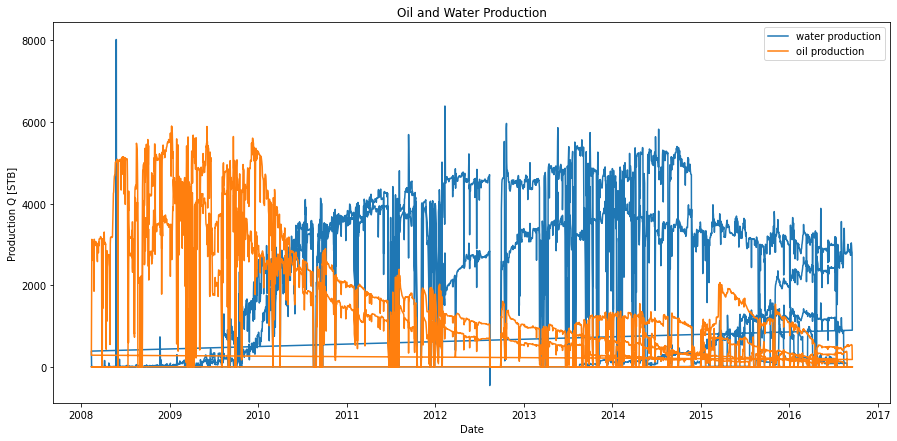

In [10]:
plt.figure(figsize=(15,7))
plt.plot(df["DATEPRD"],df["BORE_WAT_VOL"],label="water production")
plt.plot(df["DATEPRD"],df["BORE_OIL_VOL"],label="oil production")
plt.title("Oil and Water Production")
plt.xlabel("Date")
plt.ylabel("Production Q [STB]")
plt.legend()
plt.show()


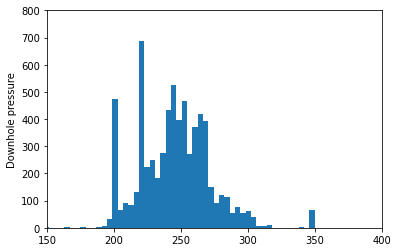

In [11]:
plt.hist(df["AVG_DOWNHOLE_PRESSURE"],bins=100)
plt.xlim(150,400);plt.ylim(0,800)
plt.ylabel("Downhole pressure")
plt.show()

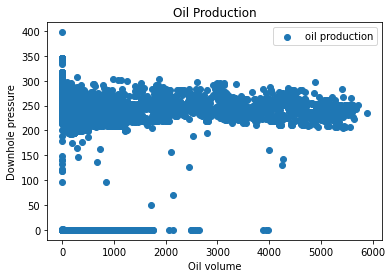

In [12]:
plt.scatter(df["BORE_OIL_VOL"],df["AVG_DOWNHOLE_PRESSURE"],label="oil production")
plt.title("Oil Production")
plt.xlabel("Oil volume")
plt.ylabel("Downhole pressure")
plt.legend()
plt.show()

* **Makeing pairplot between features**

In [13]:
lists=["ON_STREAM_HRS","BORE_OIL_VOL","AVG_ANNULUS_PRESS","AVG_DOWNHOLE_TEMPERATURE"]
input=df[lists]
input

,ON_STREAM_HRS,BORE_OIL_VOL,AVG_ANNULUS_PRESS,AVG_DOWNHOLE_TEMPERATURE
0,0.0,0.0,0.000,0.000
1,0.0,0.0,0.000,NaN
2,0.0,0.0,0.000,NaN
3,0.0,0.0,0.000,NaN
4,0.0,0.0,0.000,96.876
...,...,...,...,...
15629,0.0,0.0,0.273,NaN
15630,0.0,0.0,0.287,NaN
15631,0.0,0.0,0.286,NaN
15632,0.0,0.0,0.272,NaN


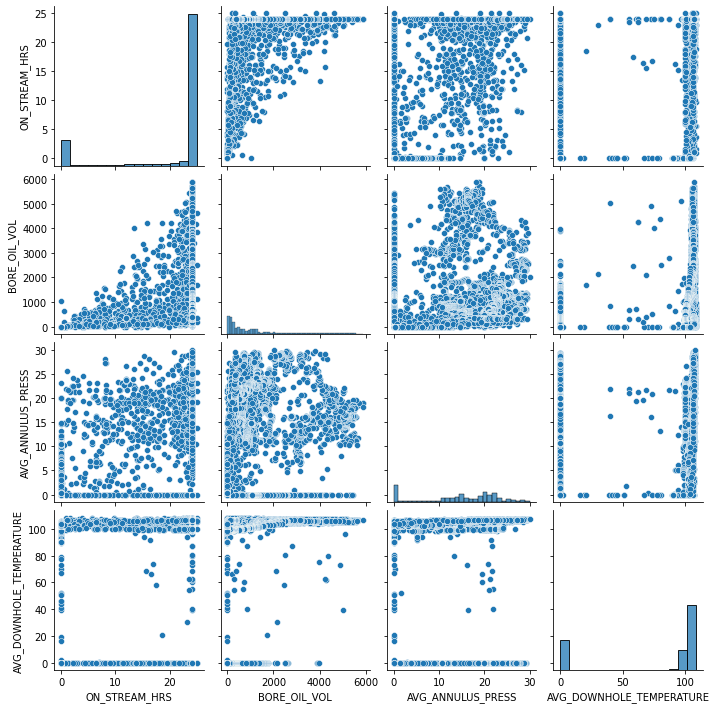

In [14]:
sns.pairplot(input)

* **Visualise missing values**

<AxesSubplot:>

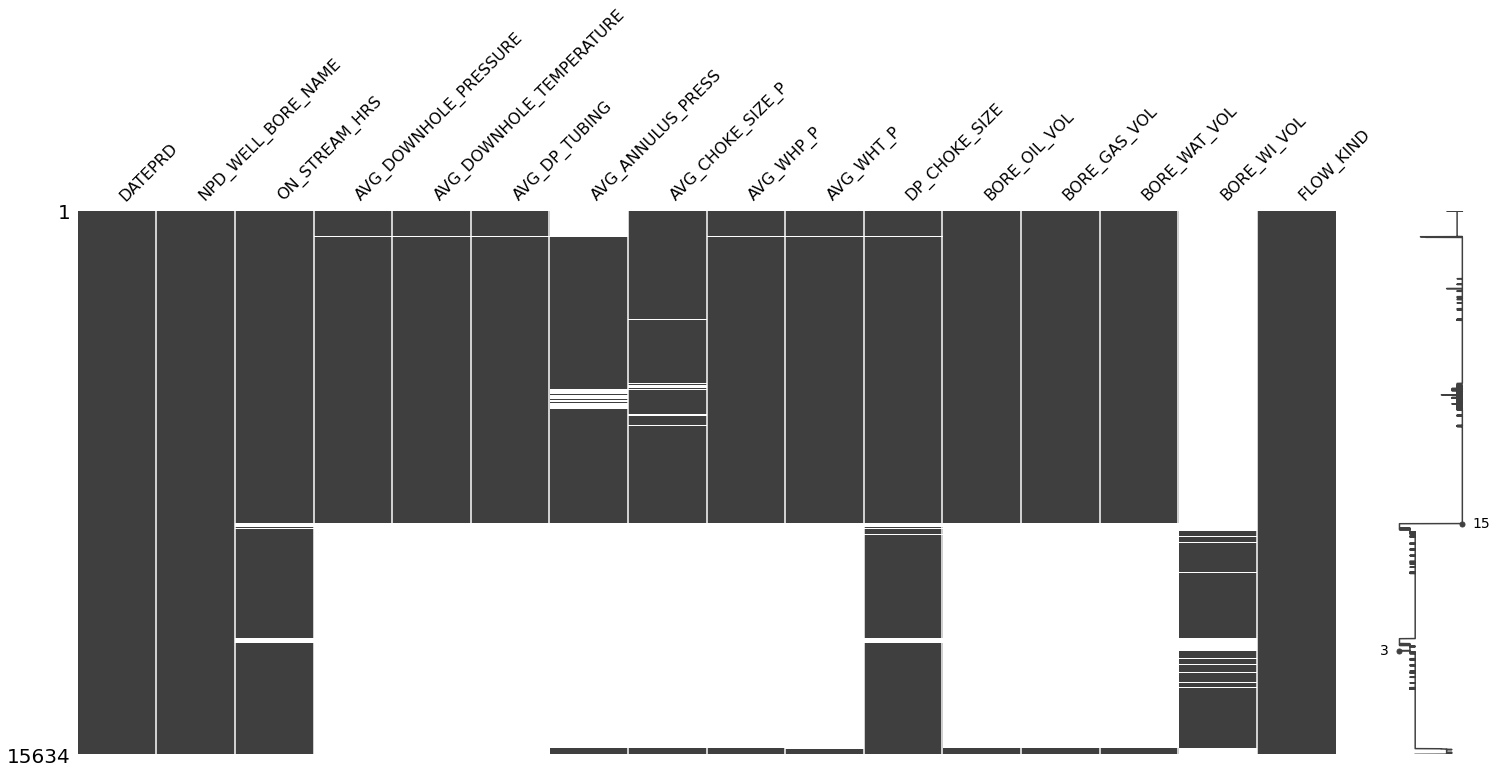

In [15]:
msno.matrix(df)

In [16]:
df.dtypes

DATEPRD                     datetime64[ns]
NPD_WELL_BORE_NAME                  object
ON_STREAM_HRS                      float64
AVG_DOWNHOLE_PRESSURE              float64
AVG_DOWNHOLE_TEMPERATURE           float64
AVG_DP_TUBING                      float64
AVG_ANNULUS_PRESS                  float64
AVG_CHOKE_SIZE_P                   float64
AVG_WHP_P                          float64
AVG_WHT_P                          float64
DP_CHOKE_SIZE                      float64
BORE_OIL_VOL                       float64
BORE_GAS_VOL                       float64
BORE_WAT_VOL                       float64
BORE_WI_VOL                        float64
FLOW_KIND                           object
dtype: object

* **Use df.interpolate to fill in missing values**

In [17]:
df2=df.copy()

for col in range (2, 15):
    df2[df2.columns[col]] = df2[df2.columns[col]].interpolate(method="linear")

In [18]:
df2.head(10)

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,2014-04-07,15/9-F-1 C,0.0,0.000,0.000,0.0000,0.0,0.00000,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
1,2014-04-08,15/9-F-1 C,0.0,77.594,24.219,69.3195,0.0,1.00306,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
2,2014-04-09,15/9-F-1 C,0.0,155.188,48.438,138.6390,0.0,0.97901,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
3,2014-04-10,15/9-F-1 C,0.0,232.782,72.657,207.9585,0.0,0.54576,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
4,2014-04-11,15/9-F-1 C,0.0,310.376,96.876,277.2780,0.0,1.21599,33.098,10.480,33.072,0.0,0.0,0.0,NaN,production
5,2014-04-12,15/9-F-1 C,0.0,303.501,96.923,281.4470,0.0,3.08702,22.053,8.704,22.053,0.0,0.0,0.0,NaN,production
6,2014-04-13,15/9-F-1 C,0.0,303.535,96.959,276.0320,0.0,1.96237,27.503,9.423,16.163,0.0,0.0,0.0,NaN,production
7,2014-04-14,15/9-F-1 C,0.0,303.782,96.969,282.7870,0.0,0.00000,20.996,8.131,20.737,0.0,0.0,0.0,NaN,production
8,2014-04-15,15/9-F-1 C,0.0,303.858,97.021,289.9410,0.0,31.14186,13.918,8.498,12.182,0.0,0.0,0.0,NaN,production
9,2014-04-16,15/9-F-1 C,0.0,303.792,97.066,299.6720,0.0,0.00000,4.120,8.821,1.490,0.0,0.0,0.0,NaN,production


<AxesSubplot:>

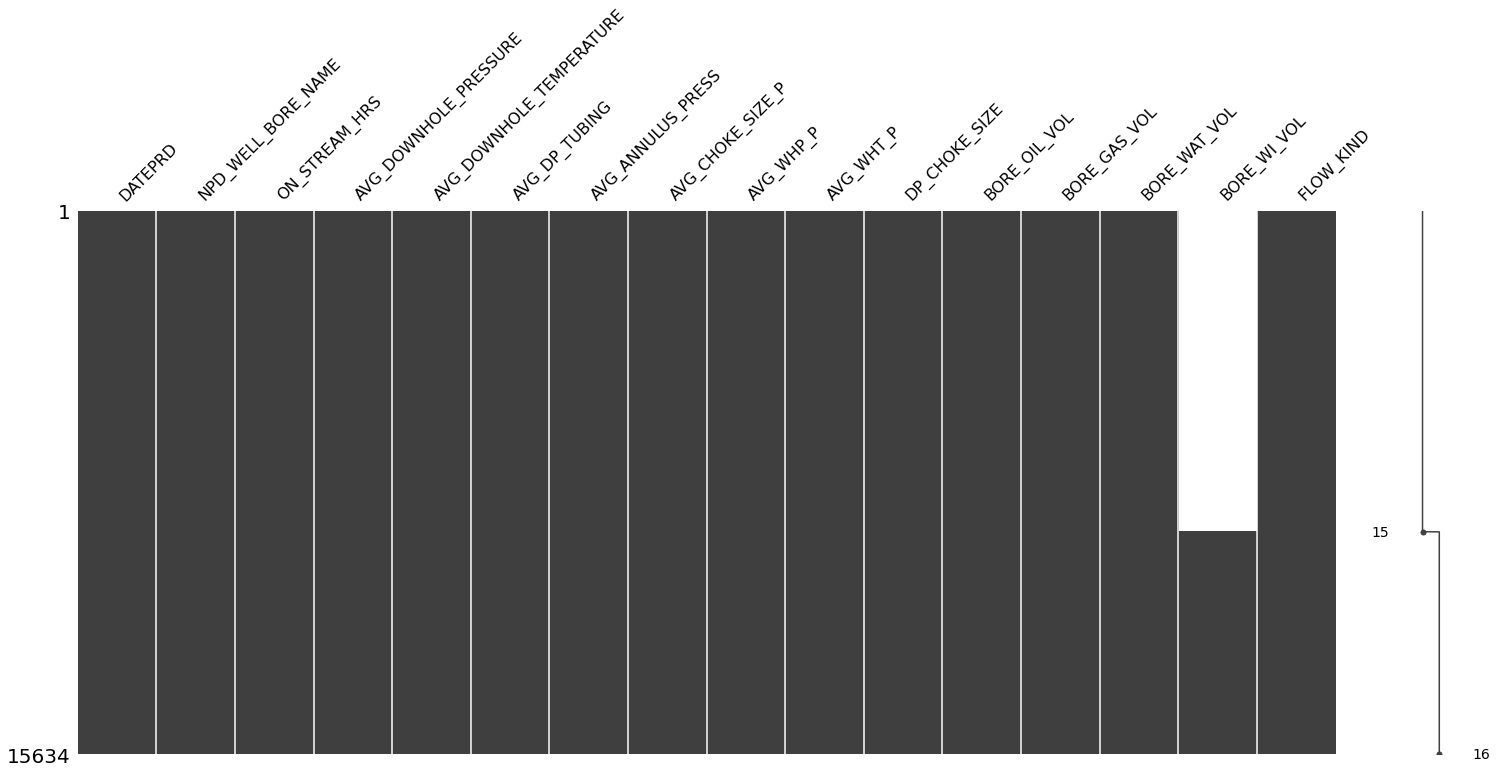

In [19]:
msno.matrix(df2)